# 4.10 - Coding Etiquette & Excel Reporting (Part 2)







### This script contains the following points:

* 01 - Importing Libraries
* 02 - Importing Data
* 03 - Creating Geographical Segmentation by Regions
* 04 - Analyzing Spending Habits by Region
* 05 - Customer Profiling
    * a) Loyalty Flag
    * b) Age_group Flag
    * c) Income_range Flag
    * d) Department Flag
    * e) Dependents_status Flag
    * f) Price_range Flag
    * g) Marital_status Flag
    * h) Pet_status Flag
    * i) Alcohol_status Flag
    * j) Baby_status Flag
    * k) Personal_care_status Flag
 
* 06 - Exporting Visualizations
* 07 - Exporting Data

---

# 01 - Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

---

# 02 - Importing Data

In [2]:
# Define path

path = r'/Users/juanigalvalisi/01-07-2022 - Instacart Basket Analysis/'

In [3]:
# Import final_dataframe_4_10.pkl

df_merged = pd.read_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'final_dataframe_4_10.pkl'))

In [4]:
# Ignore maximum of columns

pd.options.display.max_columns = None

In [5]:
# Check the output of df_merged through the .head() function

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,outlier_prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_user_spending,spender_flag,order_frequency_median,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,total_orders,customer_activity
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,NaN,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity


In [6]:
# Check the output of df_merged through the .shape function

df_merged.shape

(32401975, 32)

In [7]:
# Check the output

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32401975 entries, 0 to 32404854
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                object 
 1   user_id                 object 
 2   order_number            int8   
 3   orders_day_of_week      int8   
 4   order_hour_of_day       int8   
 5   days_last_order         float16
 6   new_customer            bool   
 7   product_id              object 
 8   add_to_cart_order       int16  
 9   reordered               int8   
 10  product_name            object 
 11  department_id           int8   
 12  prices                  float16
 13  outlier_prices          object 
 14  price_range             object 
 15  busiest_day             object 
 16  busiest_period_of_day   object 
 17  max_order               int8   
 18  loyalty_flag            object 
 19  mean_user_spending      float16
 20  spender_flag            object 
 21  order_frequency_median  float

---

# 03 - Creating Geographical Segmentation by Regions

In [8]:
# List states by Northeast region

Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut',
             'New York', 'Pennsylvania', 'New Jersey']

In [9]:
# List states by Midwest region

Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota',
           'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [10]:
# List states by South region

South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina',
         'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama',
         'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [11]:
# List states by West region

West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
        'Washington', 'Oregon', 'California', 'Hawaii']

In [12]:
# Create a region flag column according to the state column

result = []

for state in df_merged['state']:
  if state in Northeast:
    result.append('Northeast')
  elif state in Midwest:
    result.append('Midwest')
  elif state in South:
    result.append('South')
  else:
    result.append('West')

In [13]:
# Create a new column within the df_merged dataframe and set it equal to 'result'

df_merged['region'] = result

In [14]:
# Check the output I

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,outlier_prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_user_spending,spender_flag,order_frequency_median,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,total_orders,customer_activity,region
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,NaN,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South


In [15]:
# Check the output II

df_merged.shape

(32401975, 33)

In [16]:
# Check the frequency in the new region column

df_merged['region'].value_counts(dropna = False)

South        10790797
West          8292161
Midwest       7596753
Northeast     5722264
Name: region, dtype: int64

---

# 04 - Analyzing Spending Habits by Region

### I) Region Aggregations

In [17]:
# Perform multiple aggregations I - Order numbers

region_agg_orders = df_merged.groupby('region').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [18]:
# Add count percentages of each region

region_agg_orders['order_number','percentage_of_total_counts'] = round((region_agg_orders['order_number','count'] / region_agg_orders['order_number','count'].sum()) * 100, 2)

In [19]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by region

region_agg_orders.head()

order_number                                             
                  mean min max     count percentage_of_total_counts
region                                                             
Midwest      16.926250   1  99   7596753                      23.45
Northeast    17.216976   1  99   5722264                      17.66
South        17.152485   1  99  10790797                      33.30
West         17.280695   1  99   8292161                      25.59

In [20]:
# Perform multiple aggregations II - Prices

region_agg_prices = df_merged.groupby('region').agg({'prices': ['mean', 'min', 'max']})

In [21]:
# Check the final output of the mean, min, and max of prices by region

region_agg_prices

prices           
               mean  min   max
region                        
Midwest    7.792969  1.0  25.0
Northeast  7.785156  1.0  25.0
South      7.796875  1.0  25.0
West       7.792969  1.0  25.0

In [22]:
region_agg_prices = df_merged.groupby('region').agg({'prices': ['sum']})

In [23]:
# Perform multiple aggregations III - Day of the week

region_agg_days = df_merged.groupby('region').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [24]:
# Check the final output of the mean, min, and max of days where orders are made by region

region_agg_days

orders_day_of_week        
                        mean min max
region                              
Midwest             2.738726   0   6
Northeast           2.734954   0   6
South               2.740656   0   6
West                2.739333   0   6

In [25]:
# Perform multiple aggregations IV - Hour of the day

region_agg_hours = df_merged.groupby('region').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [26]:
# Check the final output of the mean, min, and max of hours where orders are made by region

region_agg_hours

order_hour_of_day        
                       mean min max
region                             
Midwest           13.444445   0  23
Northeast         13.424602   0  23
South             13.416900   0  23
West              13.418665   0  23

### Difference in spending habits between the different U.S. regions

>The numbers of the four regions remain static, without major oscillations. They all have similar order frequencies and the same mean prices. Beyond that, the South region has the most percentage of orders with the % 33,30, while the Northeast region has the lowest with % 17,66 of total participation.

### II) Region Visualizations

#### a) Customer Distribution by Region

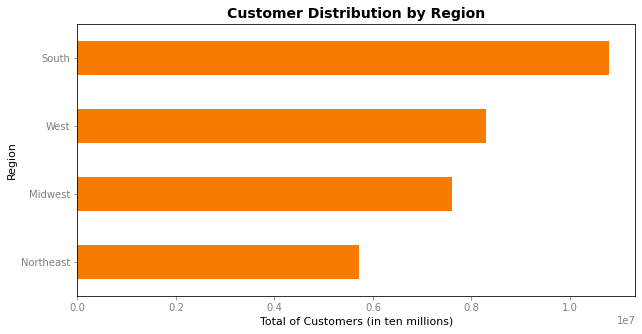

In [27]:
# Create an horizontal bar chart about customer distribution by region

region_bar = df_merged['region'].value_counts().sort_values().plot.barh(figsize = (10, 5), color = ['#f77b00'])

# Set descriptions

plt.title('Customer Distribution by Region', fontsize = 14, fontweight = 'bold')
plt.xlabel('Total of Customers (in ten millions)', fontsize = 11)
plt.ylabel('Region', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

#### b) Loyalty & Region Flags

In [28]:
# Create crosstab for loyalty and region flags

loyalty_region = pd.crosstab(index = df_merged['loyalty_flag'], columns = df_merged['region'], normalize = "index")

In [29]:
# Create a crosstab to display labels

loyalty_region_labels = pd.crosstab(index = df_merged['loyalty_flag'], columns = df_merged['region'])

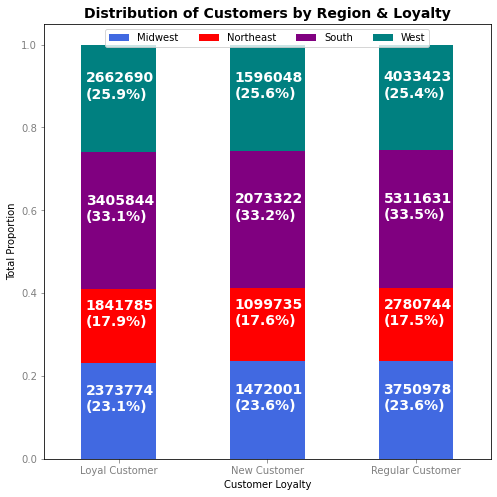

In [30]:
# Create a 100% stacked proportional bar chart based on each region and loyalty flag

loyalty_region_bar_stack = loyalty_region.plot(kind = 'bar', stacked = True, color = ['royalblue', 'red', 'purple', 'teal'], figsize = (8, 8), rot = 0)

# Set descriptions

plt.legend(loc = 'upper center', ncol = 4, fontsize = 10)
plt.ylabel('Total Proportion')
plt.xlabel('Customer Loyalty')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Distribution of Customers by Region & Loyalty', fontsize = 14, fontweight = 'bold')

# Set proportions

for a, y in enumerate([*loyalty_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                          loyalty_region_labels.loc[y],
                                          loyalty_region.loc[y].cumsum()):
        plt.text(y = (x_loc - proportion) + (proportion / 2),
                 x = a - 0.22,
                 s = f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color = 'white',
                 fontsize = 14,
                 fontweight = 'bold')
        
# Show chart

plt.show()

# 05 - Customer Profiling

## a) Loyalty Flag

### I) Loyalty Flag Visualizations

#### a) Customer Distribution by Loyalty

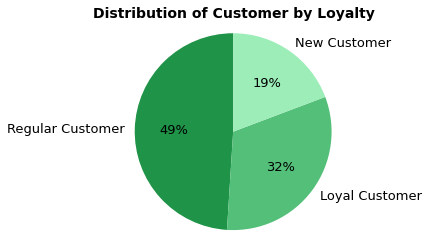

In [31]:
# Create a pie chart about the distribution of orders among customers in terms of loyalty

labels = 'Regular Customer', 'Loyal Customer', 'New Customer'
sizes = df_merged['loyalty_flag'].value_counts()
colors = ['#1f9347', '#54bf79', '#9cedb8']
textprops = {"fontsize": 13}

# Set descriptions

cust_loyal_dist_pie, ax = plt.subplots()
plt.title('Distribution of Customer by Loyalty', fontsize = 14, fontweight = 'bold')
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.f%%', startangle = 90, textprops = textprops)
ax.axis('equal')

# Show chart

plt.show()

#### b) Proportion of Spenders by Customer Loyalty

In [32]:
# Create crosstab for loyalty and spender flags

loyalty_spending = pd.crosstab(index = df_merged['loyalty_flag'], columns = df_merged['spender_flag'], normalize = "index")

In [33]:
# Create a crosstab to display labels

loyalty_spending_labels = pd.crosstab(index = df_merged['loyalty_flag'], columns = df_merged['spender_flag'])

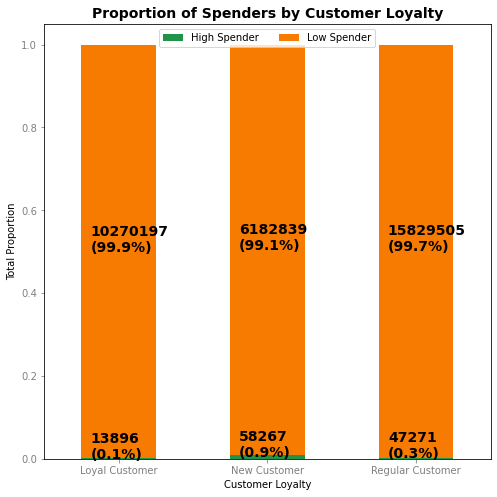

In [34]:
# Create a 100% stacked proportional bar chart based on customer spending flag for each loyalty flag

loyalty_spending_bar_stack = loyalty_spending.plot(kind = 'bar', stacked = True, color = ['#1f9347','#f77b00'], figsize = (8, 8), rot = 0)

# Set descriptions

plt.legend(loc = 'upper center', ncol = 3, fontsize = 10)
plt.ylabel('Total Proportion')
plt.xlabel('Customer Loyalty')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Proportion of Spenders by Customer Loyalty', fontsize = 14, fontweight = 'bold')

# Set proportions

for a, y in enumerate([*loyalty_spending_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_spending.loc[y],
                                          loyalty_spending_labels.loc[y],
                                          loyalty_spending.loc[y].cumsum()):
        plt.text(y = (x_loc - proportion) + (proportion / 2),
                 x = a - 0.19,
                 s = f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color = 'black',
                 fontsize = 14,
                 fontweight = 'bold')
        
# Show chart

plt.show()

#### c) Distribution of Customer Order Frequency by Loyalty

In [35]:
# Create crosstab for loyalty and order frequency flags

loyalty_frequency = pd.crosstab(index = df_merged['loyalty_flag'], columns = df_merged['order_frequency_flag'], normalize = "index")

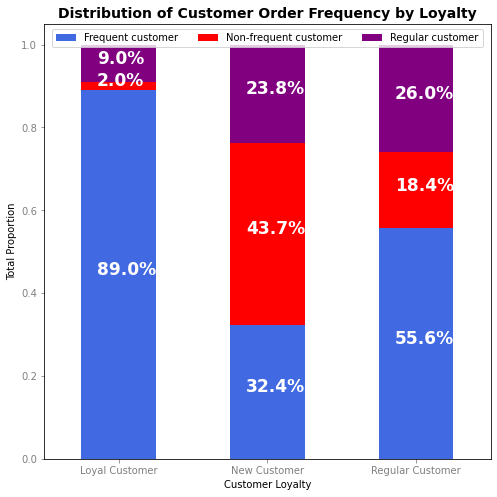

In [36]:
# Create a 100% stacked proportional bar chart based on customer frequency order flag for each loyalty flag

loyalty_ords_frequency_bar_stack = loyalty_frequency.plot(kind = 'bar', stacked = True, color = ['royalblue', 'red', 'purple'], figsize = (8, 8), rot = 0)

# Set descriptions

plt.legend(loc = 'upper center', ncol = 3, fontsize = 10)
plt.ylabel('Total Proportion')
plt.xlabel('Customer Loyalty')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Distribution of Customer Order Frequency by Loyalty', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate([*loyalty_frequency.index.values]):
    for (proportion, y_loc) in zip(loyalty_frequency.loc[x],
                                   loyalty_frequency.loc[x].cumsum()):
        plt.text(x = n - 0.145,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "white",
                 fontsize = 17,
                 fontweight = "bold")
        
# Show chart

plt.show()

---

## b) Age_group Flag

In [37]:
# Create age_group flag according to the age column

df_merged.loc[(df_merged['age']  >= 18) & (df_merged['age']  <= 25), 'age_group'] = 'Young' # Youngs from 18 to 25

df_merged.loc[(df_merged['age'] > 25) & (df_merged['age'] <= 40), 'age_group'] = 'Young adult' # Young adults from 25 to 40

df_merged.loc[(df_merged['age'] > 40) & (df_merged['age'] <= 64), 'age_group'] = 'Adult' # Adults from 40 to 65

df_merged.loc[df_merged['age'] >= 65, 'age_group'] = 'Senior' # Seniors from 65 and over

In [38]:
# Check the output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,outlier_prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_user_spending,spender_flag,order_frequency_median,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,total_orders,customer_activity,region,age_group
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,NaN,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult


In [39]:
# Check the frequency in the new age_group column

df_merged['age_group'].value_counts(dropna = False)

Adult          12158684
Senior          8574323
Young adult     7624159
Young           4044809
Name: age_group, dtype: int64

### I) Age_group aggregation

In [40]:
# Perform multiple aggregations I - Order numbers

age_group_agg_orders = df_merged.groupby('age_group').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [41]:
# Add count percentages of each age group

age_group_agg_orders['order_number','percentage_of_total_counts'] = round((age_group_agg_orders['order_number','count'] / age_group_agg_orders['order_number','count'].sum()) * 100, 2)

In [42]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by age group

age_group_agg_orders.head()

order_number                                             
                    mean min max     count percentage_of_total_counts
age_group                                                            
Adult          17.153634   1  99  12158684                      37.52
Senior         17.099576   1  99   8574323                      26.46
Young          17.174639   1  99   4044809                      12.48
Young adult    17.160827   1  99   7624159                      23.53

In [43]:
# Perform multiple aggregations II - Prices

age_group_agg_prices = df_merged.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

In [44]:
# Check the final output of the mean, min, and max, counts of prices by age group

age_group_agg_prices

prices           
                 mean  min   max
age_group                       
Adult        7.792969  1.0  25.0
Senior       7.796875  1.0  25.0
Young        7.785156  1.0  25.0
Young adult  7.789062  1.0  25.0

In [45]:
# Perform multiple aggregations III - Day of the week

age_group_agg_days = df_merged.groupby('age_group').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [46]:
# Check the final output of the mean, min, and max of days where orders are made by age group

age_group_agg_days

orders_day_of_week        
                          mean min max
age_group                             
Adult                 2.742599   0   6
Senior                2.745073   0   6
Young                 2.742394   0   6
Young adult           2.724026   0   6

In [47]:
# Perform multiple aggregations IV - Hour of the day

age_group_agg_hours = df_merged.groupby('age_group').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [48]:
# Check the final output of the mean, min, and max of hours where orders are made by age group

age_group_agg_hours

order_hour_of_day        
                         mean min max
age_group                            
Adult               13.437605   0  23
Senior              13.426541   0  23
Young               13.399445   0  23
Young adult         13.417445   0  23

### II) Age_group Visualizations

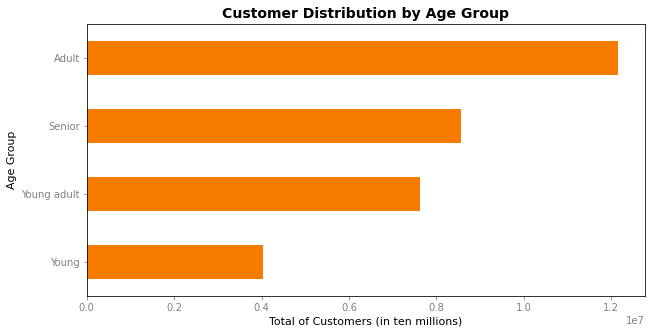

In [49]:
# Create an horizontal bar chart about age groups

age_group_dist_bar = df_merged['age_group'].value_counts().sort_values().plot.barh(figsize = (10, 5), color = ['#f77b00'])

# Set descriptions

plt.title('Customer Distribution by Age Group', fontsize = 14, fontweight = 'bold')
plt.xlabel('Total of Customers (in ten millions)', fontsize = 11)
plt.ylabel('Age Group', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

---

## c) Income_range Flag

In [50]:
# Create an income_range flag according to the income column

df_merged.loc[df_merged['income'] <= 52200, 'income_range'] = 'Low income' # Low incomes range up to $ 52.200

df_merged.loc[(df_merged['income'] > 52200) & (df_merged['income'] <= 156600), 'income_range'] = 'Middle income' # Middle incomes range from 52.200 to up to $ 50.000 25 to $ 156.600

df_merged.loc[df_merged['income'] > 156600, 'income_range'] = 'High income' # High incomes range from $ 156.600 and over

In [51]:
# Check the output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,outlier_prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_user_spending,spender_flag,order_frequency_median,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,total_orders,customer_activity,region,age_group,income_range
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,NaN,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income


In [52]:
# Check the frequency in the new income_range column

df_merged['income_range'].value_counts(dropna = False)

Middle income    25624045
Low income        3940348
High income       2837582
Name: income_range, dtype: int64

### I) Income_range aggregation

In [53]:
# Perform multiple aggregations I - Order numbers

income_range_agg_orders = df_merged.groupby('income_range').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [54]:
# Add count percentages of each income range

income_range_agg_orders['order_number','percentage_of_total_counts'] = round((income_range_agg_orders['order_number','count'] / income_range_agg_orders['order_number','count'].sum()) * 100, 2)

In [55]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by income range

income_range_agg_orders

order_number                                             
                      mean min max     count percentage_of_total_counts
income_range                                                           
High income      17.645866   1  99   2837582                       8.76
Low income       15.982221   1  99   3940348                      12.16
Middle income    17.266626   1  99  25624045                      79.08

In [56]:
# Perform multiple aggregations II - Prices

income_range_agg_prices = df_merged.groupby('income_range').agg({'prices': ['mean', 'min', 'max']})

In [57]:
# Check the final output of the mean, min, and max of prices by income range

income_range_agg_prices

prices           
                   mean  min   max
income_range                      
High income    7.949219  1.0  25.0
Low income     6.753906  1.0  25.0
Middle income  7.933594  1.0  25.0

In [58]:
# Perform multiple aggregations III - Day of the week

income_range_agg_days = df_merged.groupby('income_range').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [59]:
# Check the final output of the mean, min, and max of days where orders are made by income range

income_range_agg_days

orders_day_of_week        
                            mean min max
income_range                            
High income             2.760567   0   6
Low income              2.750791   0   6
Middle income           2.734619   0   6

In [60]:
# Perform multiple aggregations IV - Hour of the day

income_range_agg_hours = df_merged.groupby('income_range').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [61]:
# Check the final output of the mean, min, and max of hours where orders are made by income range

income_range_agg_hours

order_hour_of_day        
                           mean min max
income_range                           
High income           13.453002   0  23
Low income            13.239984   0  23
Middle income         13.450565   0  23

### II) Income_range Visualizations

#### a) Customer Distribution by Income Range

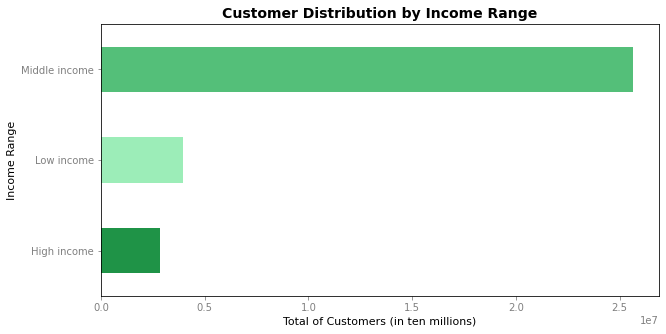

In [62]:
# Create an horizontal bar chart about income ranges

income_range_bar_dist = df_merged['income_range'].value_counts().sort_values().plot.barh(figsize = (10, 5), color = ['#1f9347', '#9cedb8', '#54bf79'])

# Set descriptions

plt.title('Customer Distribution by Income Range', fontsize = 14, fontweight = 'bold')
plt.xlabel('Total of Customers (in ten millions)', fontsize = 11)
plt.ylabel('Income Range', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

#### b) Income Range Distribution by Age Group

In [63]:
# Create crosstab for income range flag and each age group

income_age = pd.crosstab(index = df_merged['age_group'], columns = df_merged['income_range'], normalize = "index")

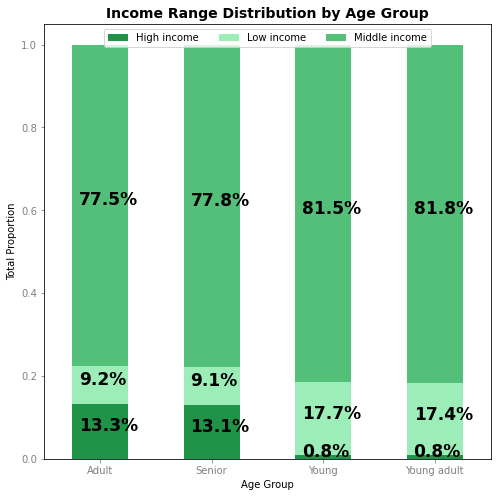

In [64]:
# Create a 100% stacked proportional bar chart based on income range flag and each age group

income_age_bar_stack = income_age.plot(kind = 'bar', stacked = True, color = ['#1f9347', '#9cedb8', '#54bf79'], figsize = (8, 8), rot = 0)

# Set descriptions

plt.legend(loc = 'upper center', ncol = 3, fontsize = 10)
plt.ylabel('Total Proportion')
plt.xlabel('Age Group')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Income Range Distribution by Age Group', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate([*income_age.index.values]):
    for (proportion, y_loc) in zip(income_age.loc[x],
                                   income_age.loc[x].cumsum()):
        plt.text(x = n - 0.19,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 17,
                 fontweight = "bold")
        
# Show chart

plt.show()

#### c) Frequency of Orders by Income

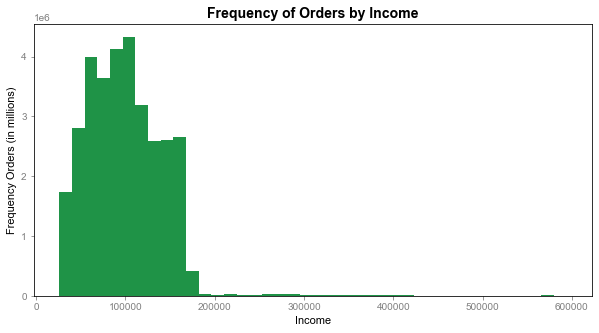

In [65]:
# Create a histogram according to incomes

ords_income_hist = df_merged['income'].plot.hist(bins = 40, figsize = (10, 5), color = '#1f9347')

# Set descriptions

sns.set_style('ticks')
plt.title('Frequency of Orders by Income', fontsize = 14, fontweight = 'bold')
plt.xlabel('Income', fontsize = 11)
plt.ylabel('Frequency Orders (in millions)', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

---

## d) Department Flag

In [66]:
# Import department.csv  

departments = pd.read_csv(os.path.join(path, '02 - Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [67]:
# Rename columns

departments.columns = ['department_id', 'department']

In [68]:
# Check the output

departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [69]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [70]:
# Create a dictionary between 'department_id' and 'department' variables

departments_zipped = zip(departments['department_id'], departments['department'])
departments_dict = dict(departments_zipped)

In [71]:
# Check the output

departments_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [72]:
# Link department ID to department names in the df_merged dataframe

df_merged['department'] = df_merged['department_id'].map(departments_dict)

In [73]:
# Check the output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,outlier_prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_user_spending,spender_flag,order_frequency_median,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,total_orders,customer_activity,region,age_group,income_range,department
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,NaN,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages


### I) Department aggregation

In [74]:
# Perform multiple aggregations I - Order numbers

departmemts_agg_orders = df_merged.groupby('department').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [75]:
# Add count percentages of each department

departmemts_agg_orders['order_number','percentage_of_total_counts'] = round((departmemts_agg_orders['order_number','count'] / departmemts_agg_orders['order_number','count'].sum()) * 100, 2)

In [76]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by department

departmemts_agg_orders

order_number                                            
                        mean min max    count percentage_of_total_counts
department                                                              
alcohol            15.221493   1  99   153630                       0.47
babies             19.310851   1  99   423791                       1.31
bakery             17.171279   1  99  1172359                       3.62
beverages          17.229947   1  99  2687384                       8.29
breakfast          16.774695   1  99   702984                       2.17
bulk               20.198669   1  99    34570                       0.11
canned goods       16.165630   1  99  1068013                       3.30
dairy eggs         17.666639   1  99  5398389                      16.66
deli               16.474216   1  99  1051193                       3.24
dry goods pasta    15.895778   1  99   866608                       2.67
frozen             15.459052   1  99  2234540                       6.90
household          15.697773   1  99   738487                       2.28
international      16.440277   1  99   269244                       0.83
meat seafood       15.888609   1  99   708879                       2.19
missing            22.903243   1  99    69142                       0.21
other              17.281179   1  99    36283                       0.11
pantry             16.584702   1  99  1875218                       5.79
personal care      16.173029   1  99   447497                       1.38
pets               15.341470   1  99    97710                       0.30
produce            17.812274   1  99  9478765                      29.25
snacks             17.178707   1  99  2887289                       8.91

In [77]:
# Perform multiple aggregations II - Prices

departmemts_agg_prices = df_merged.groupby('department').agg({'prices': ['mean', 'min', 'max']})

In [78]:
# Check the output

departmemts_agg_prices

prices                     
                      mean       min        max
department                                     
alcohol           8.140625  1.000000  15.000000
babies            7.636719  1.000000  15.000000
bakery            7.855469  1.000000  15.000000
beverages         7.679688  1.000000  15.000000
breakfast         8.031250  1.000000  14.898438
bulk              8.351562  1.400391  14.101562
canned goods      7.539062  1.000000  15.000000
dairy eggs        8.343750  1.000000  15.000000
deli              7.777344  1.000000  15.000000
dry goods pasta   7.351562  1.000000  15.000000
frozen            7.738281  1.000000  15.000000
household         7.382812  1.000000  15.000000
international     7.683594  1.000000  15.000000
meat seafood     16.296875  8.000000  25.000000
missing           8.664062  1.000000  15.000000
other             6.992188  1.099609  15.000000
pantry            8.007812  1.000000  20.000000
personal care     7.996094  1.000000  15.000000
pets              7.890625  1.000000  15.000000
produce           7.980469  1.000000  15.000000
snacks            4.277344  1.599609   7.000000

In [79]:
# Perform multiple aggregations III - Day of the week

departments_agg_days = df_merged.groupby('department').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [80]:
# Check the final output of the mean, min, and max of days where orders are made by department

departments_agg_days

orders_day_of_week        
                              mean min max
department                                
alcohol                   3.162917   0   6
babies                    2.711011   0   6
bakery                    2.743038   0   6
beverages                 2.807204   0   6
breakfast                 2.731140   0   6
bulk                      2.759126   0   6
canned goods              2.707182   0   6
dairy eggs                2.739650   0   6
deli                      2.705500   0   6
dry goods pasta           2.690499   0   6
frozen                    2.790488   0   6
household                 2.835441   0   6
international             2.691941   0   6
meat seafood              2.718059   0   6
missing                   2.800816   0   6
other                     2.851253   0   6
pantry                    2.810494   0   6
personal care             2.816698   0   6
pets                      2.934848   0   6
produce                   2.683672   0   6
snacks                    2.751477   0   6

In [81]:
# Perform multiple aggregations IV - Hour of the day

departments_agg_hours = df_merged.groupby('department').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [82]:
# Check the final output of the mean, min, and max of hours where orders are made by department

departments_agg_hours

order_hour_of_day        
                             mean min max
department                               
alcohol                 13.594194   0  23
babies                  13.397656   0  23
bakery                  13.398598   0  23
beverages               13.314119   0  23
breakfast               13.330655   0  23
bulk                    13.458490   0  23
canned goods            13.453372   0  23
dairy eggs              13.367735   0  23
deli                    13.481557   0  23
dry goods pasta         13.546049   0  23
frozen                  13.681663   0  23
household               13.349948   0  23
international           13.518901   0  23
meat seafood            13.468517   0  23
missing                 13.454818   0  23
other                   13.498884   0  23
pantry                  13.458811   0  23
personal care           13.486987   0  23
pets                    13.578436   0  23
produce                 13.424977   0  23
snacks                  13.360854   0  23

### II) Department Visualizations

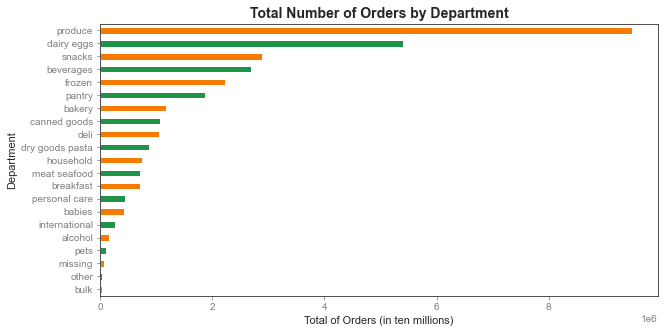

In [83]:
# Create an horizontal bar chart about departments

department_bar_dist = df_merged['department'].value_counts().sort_values().plot.barh(figsize = (10, 5), color = ['#f77b00', '#1f9347'])

# Set descriptions

plt.title('Total Number of Orders by Department', fontsize = 14, fontweight = 'bold')
plt.xlabel('Total of Orders (in ten millions)', fontsize = 11)
plt.ylabel('Department', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

---

## e) Dependents_status Flag

In [84]:
# Create an number_of_dependents flag according to the number of dependents column

df_merged.loc[df_merged['number_of_dependants'] == 0, 'dependents_status'] = 'No dependents' # Customers without dependents are 'No dependents'

df_merged.loc[df_merged['number_of_dependants'] >= 1, 'dependents_status'] = 'With dependents' # Customers with dependents are 'With dependents'

In [85]:
# Check the output

df_merged.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_last_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,outlier_prices,price_range,busiest_day,busiest_period_of_day,max_order,loyalty_flag,mean_user_spending,spender_flag,order_frequency_median,order_frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,total_orders,customer_activity,region,age_group,income_range,department,dependents_status
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,NaN,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages,With dependents
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages,With dependents
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Regularly busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages,With dependents
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Average orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages,With dependents
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,7,9.0,Not Outlier,Mid-range product,Least busy,Most orders,10,New Customer,6.367188,Low Spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,59,Normal activity,South,Young adult,Low income,beverages,With dependents


In [86]:
# Check the frequency in the new 'dependents_status' column

df_merged['dependents_status'].value_counts(dropna = False)

With dependents    24305226
No dependents       8096749
Name: dependents_status, dtype: int64

### I) Dependents_status Aggregation

In [87]:
# Perform multiple aggregations I - Order numbers

depend_status_agg_orders = df_merged.groupby('dependents_status').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [88]:
# Add count percentages of each dependent status

depend_status_agg_orders['order_number','percentage_of_total_counts'] = round((depend_status_agg_orders['order_number','count'] / depend_status_agg_orders['order_number','count'].sum()) * 100, 2)

In [89]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by dependent status

depend_status_agg_orders.head()

order_number                                             
                          mean min max     count percentage_of_total_counts
dependents_status                                                          
No dependents        17.266036   1  99   8096749                      24.99
With dependents      17.102871   1  99  24305226                      75.01

In [90]:
# Perform multiple aggregations II - Prices

depend_status_agg_prices = df_merged.groupby('dependents_status').agg({'prices': ['mean', 'min', 'max']})

In [91]:
# Check the final output of the mean, min, and max prices by dependent status

depend_status_agg_prices

prices           
                       mean  min   max
dependents_status                     
No dependents      7.789062  1.0  25.0
With dependents    7.792969  1.0  25.0

In [92]:
# Perform multiple aggregations III - Day of the week

depend_status_agg_days = df_merged.groupby('dependents_status').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [93]:
# Check the final output of the mean, min, and max of days where orders are made by dependent status

depend_status_agg_days

orders_day_of_week        
                                mean min max
dependents_status                           
No dependents               2.733825   0   6
With dependents             2.740535   0   6

In [94]:
# Perform multiple aggregations IV - Hour of the day

depend_status_agg_hours = df_merged.groupby('dependents_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [95]:
# Check the final output of the mean, min, and max of hours where orders are made by dependent status

depend_status_agg_hours

order_hour_of_day        
                               mean min max
dependents_status                          
No dependents             13.433067   0  23
With dependents           13.422539   0  23

### II) Dependents_status Visualizations

#### a) Dependent Status Distribution

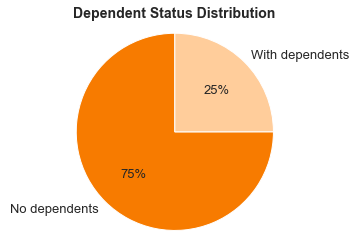

In [96]:
# Create a pie chart about dependent status

labels = 'No dependents', 'With dependents'
sizes = df_merged['dependents_status'].value_counts()
colors = ['#f77b00', '#ffcd9b']
textprops = {"fontsize": 13}

# Set descriptions

depend_status_distr_pie, ax = plt.subplots()
plt.title('Dependent Status Distribution', fontsize = 14, fontweight = 'bold')
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.f%%', startangle = 90, textprops = textprops)
ax.axis('equal')  

# Show chart

plt.show()

---

## f) Price_range Flag

In [97]:
# Check the frequency in the price_range column

df_merged['price_range'].value_counts(dropna = False)

Mid-range product     21864163
Low-range product     10125288
High-range product      412524
Name: price_range, dtype: int64

### I) Price_range Aggregation

In [98]:
# Perform multiple aggregations I - Order numbers

price_range_agg_orders = df_merged.groupby('price_range').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [99]:
# Add count percentages of each price range

price_range_agg_orders['order_number','percentage_of_total_counts'] = round((price_range_agg_orders['order_number','count'] / price_range_agg_orders['order_number','count'].sum()) * 100, 2)

In [100]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by price range

price_range_agg_orders.head()

order_number                                             
                           mean min max     count percentage_of_total_counts
price_range                                                                 
High-range product    15.857412   1  99    412524                       1.27
Low-range product     17.118510   1  99  10125288                      31.25
Mid-range product     17.179551   1  99  21864163                      67.48

In [101]:
# Perform multiple aggregations II - Prices

price_range_agg_prices = df_merged.groupby('price_range').agg({'prices': ['mean', 'min', 'max']})

In [102]:
# Check the final output of the mean, min, and max prices by price range

price_range_agg_prices

prices                 
                         mean        min   max
price_range                                   
High-range product  20.609375  15.101562  25.0
Low-range product    3.023438   1.000000   5.0
Mid-range product    9.757812   5.101562  15.0

In [103]:
# Perform multiple aggregations III - Day of the week

price_range_agg_days = df_merged.groupby('price_range').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [104]:
# Check the final output of the mean, min, and max of days where orders are made by price range

price_range_agg_days

orders_day_of_week        
                                 mean min max
price_range                                  
High-range product           2.731315   0   6
Low-range product            2.744185   0   6
Mid-range product            2.736533   0   6

In [105]:
# Perform multiple aggregations IV - Hour of the day

price_range_agg_hours = df_merged.groupby('price_range').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [106]:
# Check the final output of the mean, min, and max of hours where orders are made by price range

price_range_agg_hours

order_hour_of_day        
                                mean min max
price_range                                 
High-range product         13.461103   0  23
Low-range product          13.411286   0  23
Mid-range product          13.430922   0  23

### II) Price_range Visualizations

#### a) Price Range Distribution of Orders

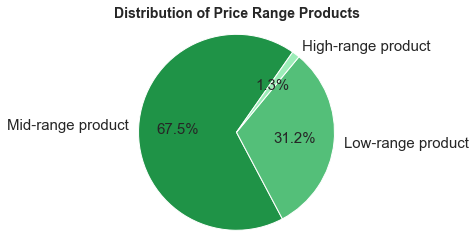

In [107]:
# Create a pie chart for price range distribution

labels = 'Mid-range product', 'Low-range product', 'High-range product'
sizes = df_merged['price_range'].value_counts()
colors = ['#1f9347', '#54bf79', '#9cedb8']
textprops = {"fontsize": 15}

# Set descriptions

price_range_distr_pie, ax = plt.subplots()
plt.title('Distribution of Price Range Products', fontsize = 14, fontweight = 'bold')
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 55, textprops = textprops)
ax.axis('equal')

# Show chart

plt.show()

---

## g) Marital_status Flag

In [108]:
# Check the frequency in the marital_status column

df_merged['marital_status'].value_counts(dropna = False)

married                             22754753
single                               5325187
divorced/widowed                     2771562
living with parents and siblings     1550473
Name: marital_status, dtype: int64

### I) Marital Status Aggregation

In [109]:
# Perform multiple aggregations I - Order numbers

marital_status_agg_orders = df_merged.groupby('marital_status').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [110]:
# Add count percentages of each marital status

marital_status_agg_orders['order_number','percentage_of_total_counts'] = round((marital_status_agg_orders['order_number','count'] / marital_status_agg_orders['order_number','count'].sum()) * 100, 2)

In [111]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by marital status

marital_status_agg_orders.head()

order_number                    \
                                         mean min max     count   
marital_status                                                    
divorced/widowed                    17.277245   1  99   2771562   
living with parents and siblings    17.297643   1  99   1550473   
married                             17.089600   1  99  22754753   
single                              17.260202   1  99   5325187   

                                                             
                                 percentage_of_total_counts  
marital_status                                               
divorced/widowed                                       8.55  
living with parents and siblings                       4.79  
married                                               70.23  
single                                                16.43

In [112]:
# Perform multiple aggregations II - Prices

marital_status_agg_prices = df_merged.groupby('marital_status').agg({'prices': ['mean', 'min', 'max']})

In [113]:
# Check the final output of the mean, min, and max prices by marital status

marital_status_agg_prices

prices           
                                      mean  min   max
marital_status                                       
divorced/widowed                  7.800781  1.0  25.0
living with parents and siblings  7.800781  1.0  25.0
married                           7.792969  1.0  25.0
single                            7.785156  1.0  25.0

In [114]:
# Perform multiple aggregations III - Day of the week

marital_status_agg_days = df_merged.groupby('marital_status').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [115]:
# Check the final output of the mean, min, and max of days where orders are made by marital status

marital_status_agg_days

orders_day_of_week        
                                               mean min max
marital_status                                             
divorced/widowed                           2.747832   0   6
living with parents and siblings           2.745748   0   6
married                                    2.740179   0   6
single                                     2.726535   0   6

In [116]:
# Perform multiple aggregations IV - Hour of the day

marital_status_agg_hours = df_merged.groupby('marital_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [117]:
# Check the output

marital_status_agg_hours

order_hour_of_day        
                                              mean min max
marital_status                                            
divorced/widowed                         13.446030   0  23
living with parents and siblings         13.410289   0  23
married                                  13.423374   0  23
single                                   13.426319   0  23

### II) Marital Status Visualizations

#### a) Total Number of Customers by Marital Status

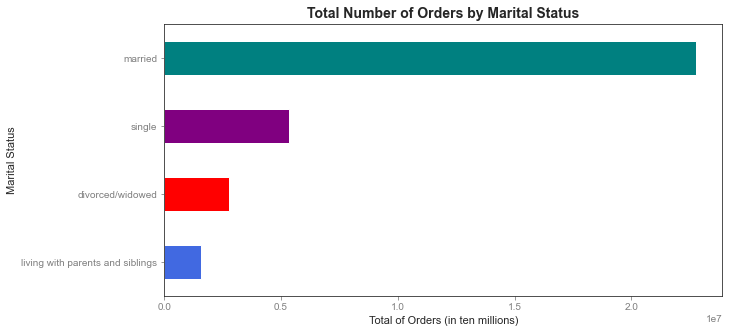

In [118]:
# a) Create an horizontal bar chart about marital status

marital_status_barh = df_merged['marital_status'].value_counts().sort_values().plot.barh(figsize = (10, 5), color = ['royalblue', 'red', 'purple', 'teal'])

# Set descriptions

plt.title('Total Number of Orders by Marital Status', fontsize = 14, fontweight = 'bold')
plt.xlabel('Total of Orders (in ten millions)', fontsize = 11)
plt.ylabel('Marital Status', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

#### b) Total Number of Customers by Age Group & Marital Status

In [119]:
# Create income marital status/age group crosstab

marital_status_age_bar = pd.crosstab(df_merged['age_group'], df_merged['marital_status'], dropna = False )

In [120]:
marital_status_age_bar

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Adult,651671,0,9088153,2418860
Senior,2119891,0,6454432,0
Young,0,1550473,1496879,997457
Young adult,0,0,5715289,1908870


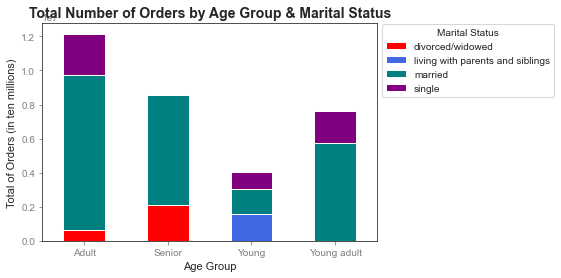

In [121]:
# Plot stacked bar chart of marital status & age group crosstab

marital_status_age_bar = marital_status_age_bar.plot(kind = 'bar', stacked = True, rot = 0, color = ['red', 'royalblue', 'teal', 'purple'])

# Set descriptions

marital_status_age_bar.legend(title = 'Marital Status', bbox_to_anchor = (1, 1.02), loc = 'upper left', )
plt.title('Total Number of Orders by Age Group & Marital Status', fontsize = 14, fontweight = 'bold')
plt.xlabel('Age Group', fontsize = 11)
plt.ylabel('Total of Orders (in ten millions)', fontsize = 11)
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')

# Show chart

plt.show()

---

## h) Pet_status Flag

### a) Pet_status Profile

In [122]:
# Create a pet flag to see if customers have bought or not pet products

df_merged['pet_status'] = [1 if x == 'pets' else 0 for x in df_merged['department']]

In [123]:
# Apply the new column to all orders

df_merged['pet_status'] = df_merged.groupby(['user_id'])['pet_status'].transform(np.max)

In [124]:
# Check the frequency in the pet_status column

df_merged['pet_status'].value_counts(dropna = False)

0    28873845
1     3528130
Name: pet_status, dtype: int64

### I) Pet Aggregation

In [125]:
# Perform multiple aggregations I - Order numbers

pet_status_agg_orders = df_merged.groupby('pet_status').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [126]:
# Add count percentages of each pet status

pet_status_agg_orders['order_number','percentage_of_total_counts'] = round((pet_status_agg_orders['order_number','count'] / marital_status_agg_orders['order_number','count'].sum()) * 100, 2)

In [127]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by pet status

pet_status_agg_orders.head()

order_number                                             
                   mean min max     count percentage_of_total_counts
pet_status                                                          
0             16.889463   1  99  28873845                      89.11
1             19.223828   1  99   3528130                      10.89

In [128]:
# Perform multiple aggregations II - Prices

pet_status_agg_prices = df_merged.groupby('pet_status').agg({'prices': ['mean', 'min', 'max']})

In [129]:
# Check the final output of the mean, min, and max prices by pet status

pet_status_agg_prices

prices           
                mean  min   max
pet_status                     
0           7.789062  1.0  25.0
1           7.812500  1.0  25.0

In [130]:
# Perform multiple aggregations III - Day of the week

pet_status_agg_days = df_merged.groupby('pet_status').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [131]:
# Check the final output of the mean, min, and max of days where orders are made by pet status

pet_status_agg_days

orders_day_of_week        
                         mean min max
pet_status                           
0                    2.727900   0   6
1                    2.828539   0   6

In [132]:
# Perform multiple aggregations IV - Hour of the day

pet_status_agg_hours = df_merged.groupby('pet_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [133]:
# Check the output

pet_status_agg_hours

order_hour_of_day        
                        mean min max
pet_status                          
0                  13.415380   0  23
1                  13.505286   0  23

### II) Pet Visualizations

#### a) Pet consumers distribution

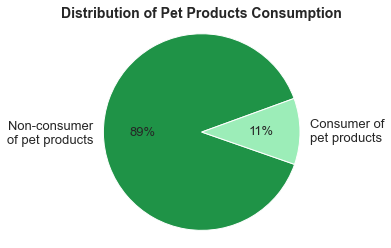

In [134]:
# Create a pie chart for pet consumers distribution

labels =  'Non-consumer' '\n' 'of pet products', 'Consumer of' '\n' 'pet products'
sizes = df_merged['pet_status'].value_counts()
colors = ['#1f9347', '#9cedb8']
textprops = {"fontsize": 13}

# Set descriptions

pet_status_pie, ax = plt.subplots()
plt.title('Distribution of Pet Products Consumption', fontsize = 14, fontweight = 'bold')
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.f%%', startangle = 20, textprops = textprops)
ax.axis('equal')

# Show chart

plt.show()

#### b) Pet Product Consumers Composition by Age Group

In [135]:
# Create a pet product consumer group crosstab by age group

pet_prods_consumers_age = pd.crosstab(index = df_merged['age_group'], columns = df_merged['pet_status'], normalize = "index")

In [136]:
# Check the output

pet_prods_consumers_age

pet_status,0,1
age_group,,
Adult,0.892604,0.107396
Senior,0.888002,0.111998
Young,0.892196,0.107804
Young adult,0.891662,0.108338


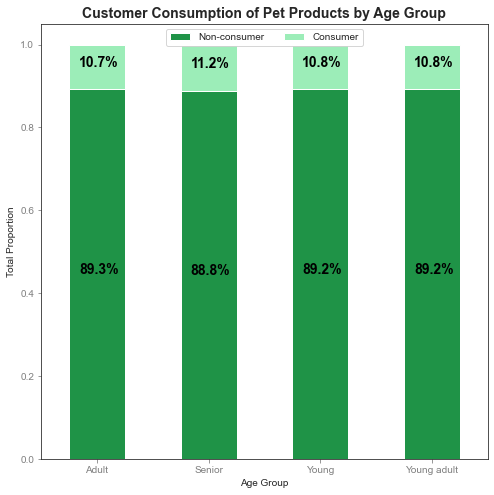

In [137]:
# Create a 100% stacked proportional bar chart based on customer consumption of pet products by age group

pet_prods_consumers_age_bar_stack = pet_prods_consumers_age.plot(kind = 'bar', stacked = True, color = ['#1f9347', '#9cedb8'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Non-consumer', 'Consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Age Group')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Pet Products by Age Group', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*pet_prods_consumers_age.index.values]):
    for (proportion, y_loc) in zip(pet_prods_consumers_age.loc[x],
                                   pet_prods_consumers_age.loc[x].cumsum()):
        plt.text(x = n - 0.16,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

#### c) Pet Product Consumers Composition by Gender

In [138]:
# Create a pet product consumer group crosstab by gender

pet_prods_consumers_gender = pd.crosstab(index = df_merged['gender'], columns = df_merged['pet_status'], normalize = "index")

In [139]:
# Check the output

pet_prods_consumers_gender

pet_status,0,1
gender,,
Female,0.890842,0.109158
Male,0.891381,0.108619


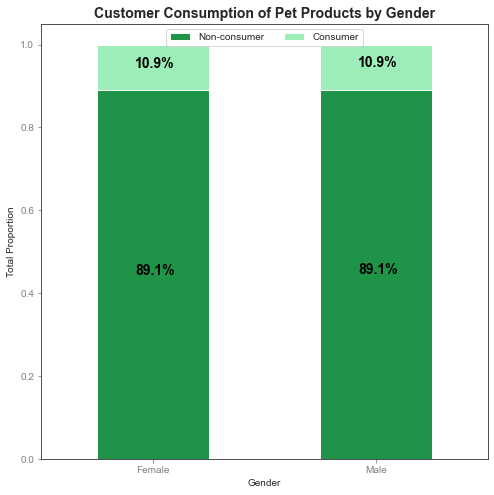

In [140]:
# Create a pie chart based on customer consumption of pet products by gender

pet_prods_consumers_gender_bar_stack = pet_prods_consumers_gender.plot(kind = 'bar', stacked = True, color = ['#1f9347', '#9cedb8'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Non-consumer', 'Consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Gender')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Pet Products by Gender', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*pet_prods_consumers_gender.index.values]):
    for (proportion, y_loc) in zip(pet_prods_consumers_gender.loc[x],
                                   pet_prods_consumers_gender.loc[x].cumsum()):
        plt.text(x = n - 0.08,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

---

## i) Alcohol_status Flag

In [141]:
# Create a pet flag to see if customers have bought or not alcohol products

df_merged['alcohol_status'] = [1 if x == 'alcohol' else 0 for x in df_merged['department']]

In [142]:
# Apply the new column to all orders

df_merged['alcohol_status'] = df_merged.groupby(['user_id'])['alcohol_status'].transform(np.max)

In [143]:
# Check the frequency in the alcohol_status column

df_merged['alcohol_status'].value_counts(dropna = False)

0    29988279
1     2413696
Name: alcohol_status, dtype: int64

### I) Alcohol Aggregation

In [144]:
# Perform multiple aggregations I - Order numbers

alcohol_status_agg_orders = df_merged.groupby('alcohol_status').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [145]:
# Add count percentages of each alcohol status

alcohol_status_agg_orders['order_number','percentage_of_total_counts'] = round((alcohol_status_agg_orders['order_number','count'] / alcohol_status_agg_orders['order_number','count'].sum()) * 100, 2)

In [146]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by alcohol status

alcohol_status_agg_orders.head()

order_number                                             
                       mean min max     count percentage_of_total_counts
alcohol_status                                                          
0                 17.204242   1  99  29988279                      92.55
1                 16.390754   1  99   2413696                       7.45

In [147]:
# Perform multiple aggregations II - Prices

alcohol_status_agg_prices = df_merged.groupby('alcohol_status').agg({'prices': ['mean', 'min', 'max']})

In [148]:
# Check the final output of the mean, min, and max prices by alcohol status

alcohol_status_agg_prices

prices           
                    mean  min   max
alcohol_status                     
0               7.792969  1.0  25.0
1               7.785156  1.0  25.0

In [149]:
# Perform multiple aggregations III - Day of the week

alcohol_status_agg_days = df_merged.groupby('alcohol_status').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [150]:
# Check the final output of the mean, min, and max of days where orders are made by alcohol status

alcohol_status_agg_days

orders_day_of_week        
                             mean min max
alcohol_status                           
0                        2.729081   0   6
1                        2.860327   0   6

In [151]:
# Perform multiple aggregations IV - Hour of the day

alcohol_status_agg_hours = df_merged.groupby('alcohol_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [152]:
# Check the output

alcohol_status_agg_hours

order_hour_of_day        
                            mean min max
alcohol_status                          
0                      13.424843   0  23
1                      13.429235   0  23

### II) Alcohol Visualizations

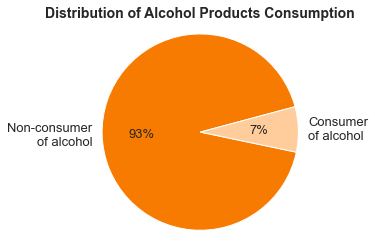

In [153]:
# Create a pie chart for alcohol consumers distribution

labels =  'Non-consumer' '\n' 'of alcohol', 'Consumer' '\n' 'of alcohol'
sizes = df_merged['alcohol_status'].value_counts()
colors = ['#f77b00', '#ffcd9b']
textprops = {"fontsize": 13}

# Set descriptions

alcohol_status_pie, ax = plt.subplots()
plt.title('Distribution of Alcohol Products Consumption', fontsize = 14, fontweight = 'bold')
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.f%%', startangle = 15, textprops = textprops)
ax.axis('equal')

# Show chart

plt.show()

#### b) Alcohol Product Consumers Composition by Age Group

In [154]:
# Create a alcohol product consumption group crosstab by age group

alcohol_prods_consumers_age = pd.crosstab(index = df_merged['age_group'], columns = df_merged['alcohol_status'], normalize = "index")

In [155]:
# Check the output

alcohol_prods_consumers_age

alcohol_status,0,1
age_group,,
Adult,0.924205,0.075795
Senior,0.927475,0.072525
Young,0.923630,0.076370
Young adult,0.926369,0.073631


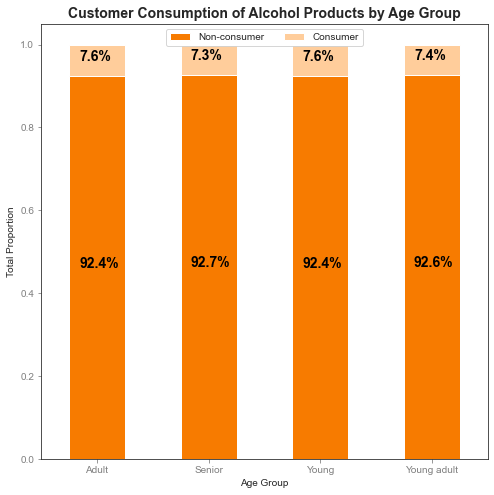

In [156]:
# Create a 100% stacked proportional bar chart based on customer consumption of alcohol products by age group

alcohol_prods_consumers_age_bar_stack = alcohol_prods_consumers_age.plot(kind = 'bar', stacked = True, color = ['#f77b00', '#ffcd9b'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Non-consumer', 'Consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Age Group')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Alcohol Products by Age Group', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*alcohol_prods_consumers_age.index.values]):
    for (proportion, y_loc) in zip(alcohol_prods_consumers_age.loc[x],
                                   alcohol_prods_consumers_age.loc[x].cumsum()):
        plt.text(x = n - 0.16,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

#### c) Alcohol Product Consumers Composition by Gender

In [157]:
# Create a alcohol product consumer group crosstab by gender

alcohol_prods_consumers_gender = pd.crosstab(index = df_merged['gender'], columns = df_merged['alcohol_status'], normalize = "index")

In [158]:
# Check the output

alcohol_prods_consumers_gender

alcohol_status,0,1
gender,,
Female,0.923359,0.076641
Male,0.927627,0.072373


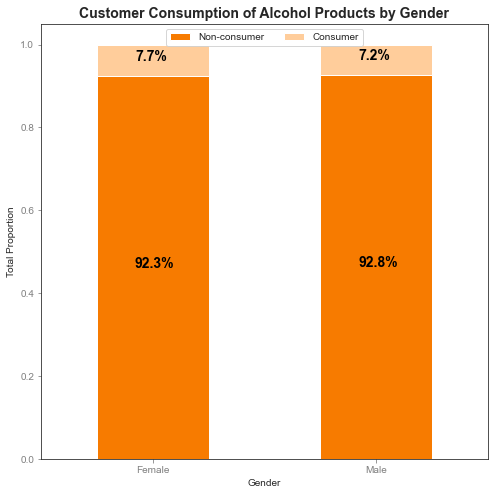

In [159]:
# Create a pie chart based on customer consumption of alcohol products by gender

alcohol_prods_consumers_gender_bar_stack = alcohol_prods_consumers_gender.plot(kind = 'bar', stacked = True, color = ['#f77b00', '#ffcd9b'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Non-consumer', 'Consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Gender')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Alcohol Products by Gender', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*alcohol_prods_consumers_gender.index.values]):
    for (proportion, y_loc) in zip(alcohol_prods_consumers_gender.loc[x],
                                   alcohol_prods_consumers_gender.loc[x].cumsum()):
        plt.text(x = n - 0.08,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

---

## j) Baby_status Flag

In [160]:
# Create a pet flag to see if customers have bought or not baby products

df_merged['baby_status'] = [1 if x == 'babies' else 0 for x in df_merged['department']]

In [161]:
# Apply the new column to all orders

df_merged['baby_status'] = df_merged.groupby(['user_id'])['baby_status'].transform(np.max)

In [162]:
# Check the frequency in the baby_status column

df_merged['baby_status'].value_counts(dropna = False)

0    22428688
1     9973287
Name: baby_status, dtype: int64

### I) Baby Status Aggregation

In [163]:
# Perform multiple aggregations I - Order numbers

baby_status_agg_orders = df_merged.groupby('baby_status').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [164]:
# Add count percentages of each baby status

baby_status_agg_orders['order_number','percentage_of_total_counts'] = round((baby_status_agg_orders['order_number','count'] / baby_status_agg_orders['order_number','count'].sum()) * 100, 2)

In [165]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by baby status

baby_status_agg_orders.head()

order_number                                             
                    mean min max     count percentage_of_total_counts
baby_status                                                          
0              15.246980   1  99  22428688                      69.22
1              21.409005   1  99   9973287                      30.78

In [166]:
# Perform multiple aggregations II - Prices

baby_status_agg_prices = df_merged.groupby('baby_status').agg({'prices': ['mean', 'min', 'max']})

In [167]:
# Check the final output of the mean, min, and max prices by baby status

baby_status_agg_prices

prices           
                 mean  min   max
baby_status                     
0            7.773438  1.0  25.0
1            7.832031  1.0  25.0

In [168]:
# Perform multiple aggregations III - Day of the week

baby_status_agg_days = df_merged.groupby('baby_status').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [169]:
# Check the final output of the mean, min, and max of days where orders are made by baby_status

baby_status_agg_days

orders_day_of_week        
                          mean min max
baby_status                           
0                     2.739319   0   6
1                     2.737822   0   6

In [170]:
# Perform multiple aggregations IV - Hour of the day

baby_status_agg_hours = df_merged.groupby('baby_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [171]:
# Check the output

baby_status_agg_hours

order_hour_of_day        
                         mean min max
baby_status                          
0                   13.420773   0  23
1                   13.435057   0  23

### II) Baby Status Visualizations

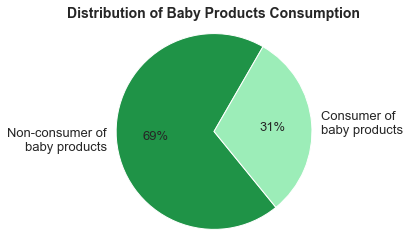

In [172]:
# Create a pie chart for baby product consumers distribution

labels =  'Non-consumer of' '\n' 'baby products', 'Consumer of' '\n' 'baby products'
sizes = df_merged['baby_status'].value_counts()
colors = ['#1f9347', '#9cedb8']
textprops = {"fontsize": 13}

# Set descriptions

baby_status_pie, ax = plt.subplots()
plt.title('Distribution of Baby Products Consumption', fontsize = 14, fontweight = 'bold')
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.f%%', startangle = 60, textprops = textprops)
ax.axis('equal')

# Show chart

plt.show()

#### b) Baby Product Consumers Composition by Age Group

In [173]:
# Create a baby product consumption group crosstab by age group

baby_prods_consumers_age = pd.crosstab(index = df_merged['age_group'], columns = df_merged['baby_status'], normalize = "index")

In [174]:
# Check the output

baby_prods_consumers_age

baby_status,0,1
age_group,,
Adult,0.690146,0.309854
Senior,0.694063,0.305937
Young,0.694346,0.305654
Young adult,0.692248,0.307752


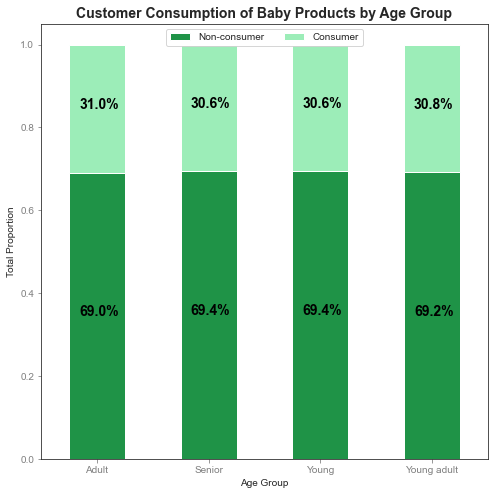

In [175]:
# Create a 100% stacked proportional bar chart based on customer consume of baby products by age group

baby_prods_consumers_age_bar_stack = baby_prods_consumers_age.plot(kind = 'bar', stacked = True, color = ['#1f9347', '#9cedb8'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Non-consumer', 'Consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Age Group')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Baby Products by Age Group', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*baby_prods_consumers_age.index.values]):
    for (proportion, y_loc) in zip(baby_prods_consumers_age.loc[x],
                                   baby_prods_consumers_age.loc[x].cumsum()):
        plt.text(x = n - 0.16,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

#### c) Baby Product Consumers Composition by Gender

In [176]:
# Create a baby product consumer group crosstab by gender

baby_prods_consumers_gender = pd.crosstab(index = df_merged['gender'], columns = df_merged['baby_status'], normalize = "index")

In [177]:
# Check the output

baby_prods_consumers_gender

baby_status,0,1
gender,,
Female,0.692576,0.307424
Male,0.691832,0.308168


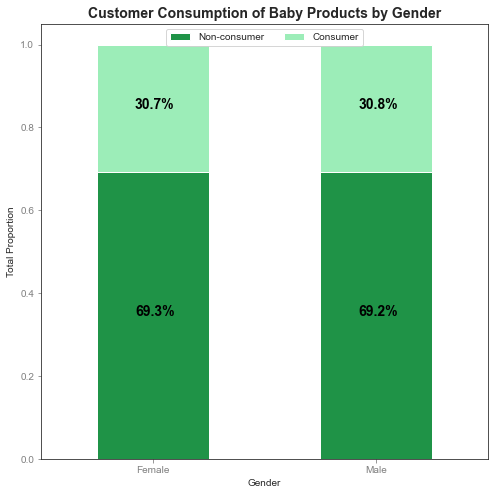

In [178]:
# Create a pie chart based on customer consume of baby products by gender

baby_prods_consumers_gender_bar_stack = baby_prods_consumers_gender.plot(kind = 'bar', stacked = True, color = ['#1f9347', '#9cedb8'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Non-consumer', 'Consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Gender')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Baby Products by Gender', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*baby_prods_consumers_gender.index.values]):
    for (proportion, y_loc) in zip(baby_prods_consumers_gender.loc[x],
                                   baby_prods_consumers_gender.loc[x].cumsum()):
        plt.text(x = n - 0.08,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

---

## k) Personal_care_status Flag

In [179]:
# Create a personal care flag to see if customers have bought or not personal care products

df_merged['personal_care_status'] = [1 if x == 'personal care' else 0 for x in df_merged['department']]

In [180]:
# Apply the new column to all orders

df_merged['personal_care_status'] = df_merged.groupby(['user_id'])['personal_care_status'].transform(np.max)

In [181]:
# Check the frequency in the personal_care_status column

df_merged['personal_care_status'].value_counts(dropna = False)

1    21100665
0    11301310
Name: personal_care_status, dtype: int64

### I) Personal Care Status Aggregation

In [182]:
# Perform multiple aggregations I - Order numbers

personal_care_status_agg_orders = df_merged.groupby('personal_care_status').agg({'order_number': ['mean', 'min', 'max', 'count']})

In [183]:
# Add count percentages of each personal care status

personal_care_status_agg_orders['order_number','percentage_of_total_counts'] = round((personal_care_status_agg_orders['order_number','count'] / personal_care_status_agg_orders['order_number','count'].sum()) * 100, 2)

In [184]:
# Check the final output of the mean, min, max, counts, and % of counts of the total number of orders by personal care status

personal_care_status_agg_orders.head()

order_number                                             
                             mean min max     count percentage_of_total_counts
personal_care_status                                                          
0                       13.007314   1  99  11301310                      34.88
1                       19.359021   1  99  21100665                      65.12

In [185]:
# Perform multiple aggregations II - Prices

personal_care_status_agg_prices = df_merged.groupby('personal_care_status').agg({'prices': ['mean', 'min', 'max']})

In [186]:
# Check the final output of the mean, min, and max prices by personal care status

personal_care_status_agg_prices

prices           
                          mean  min   max
personal_care_status                     
0                     7.800781  1.0  25.0
1                     7.785156  1.0  25.0

In [187]:
# Perform multiple aggregations III - Day of the week

personal_care_status_agg_days = df_merged.groupby('personal_care_status').agg({'orders_day_of_week': ['mean', 'min', 'max']})

In [188]:
# Check the final output of the mean, min, and max of days where orders are made by personal care status

personal_care_status_agg_days

orders_day_of_week        
                                   mean min max
personal_care_status                           
0                              2.700584   0   6
1                              2.759357   0   6

In [189]:
# Perform multiple aggregations IV - Hour of the day

personal_care_status_agg_hours = df_merged.groupby('personal_care_status').agg({'order_hour_of_day': ['mean', 'min', 'max']})

In [190]:
# Check the output

personal_care_status_agg_hours

order_hour_of_day        
                                  mean min max
personal_care_status                          
0                            13.410623   0  23
1                            13.432961   0  23

### II) Personal Care Status Visualizations

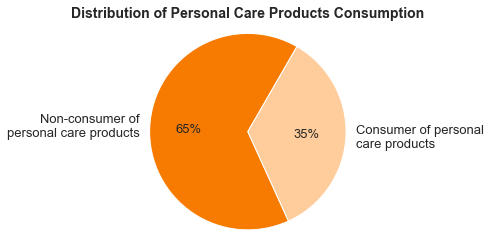

In [191]:
# Create a pie chart for personal care product consumers distribution

labels =  'Non-consumer of' '\n' 'personal care products', 'Consumer of personal' '\n' 'care products'
sizes = df_merged['personal_care_status'].value_counts()
colors = ['#f77b00', '#ffcd9b']
textprops = {"fontsize": 13}

# Set descriptions

personal_care_status_pie, ax = plt.subplots()
plt.title('Distribution of Personal Care Products Consumption', fontsize = 14, fontweight = 'bold')
ax.pie(sizes, labels = labels, colors = colors, autopct = '%1.f%%', startangle = 60, textprops = textprops)
ax.axis('equal')

# Show chart

plt.show()

#### b) Personal Care Consumers Composition by Age Group

In [192]:
# Create personal care product consumer group crosstab by age group

personal_care_consumers_age = pd.crosstab(index = df_merged['age_group'], columns = df_merged['personal_care_status'], normalize = "index")

In [193]:
# Check the output

personal_care_consumers_age

personal_care_status,0,1
age_group,,
Adult,0.348158,0.651842
Senior,0.349252,0.650748
Young,0.350327,0.649673
Young adult,0.348441,0.651559


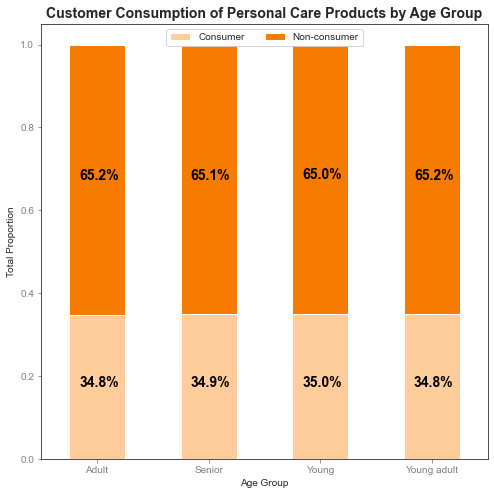

In [194]:
# Create a 100% stacked proportional bar chart based on customer consumption of personal care products by age group

personal_care_prods_consumers_age_bar_stack = personal_care_consumers_age.plot(kind = 'bar', stacked = True, color = ['#ffcd9b','#f77b00'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Consumer', 'Non-consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Age Group')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Personal Care Products by Age Group', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*personal_care_consumers_age.index.values]):
    for (proportion, y_loc) in zip(personal_care_consumers_age.loc[x],
                                   personal_care_consumers_age.loc[x].cumsum()):
        plt.text(x = n - 0.16,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

#### c) Personal Care Consumers Composition by Gender

In [195]:
# Create personal care product consumer group crosstab by gender

personal_care_consumers_gender = pd.crosstab(index = df_merged['gender'], columns = df_merged['personal_care_status'], normalize = "index")

In [196]:
# Check the output

personal_care_consumers_gender

personal_care_status,0,1
gender,,
Female,0.34597,0.65403
Male,0.35156,0.64844


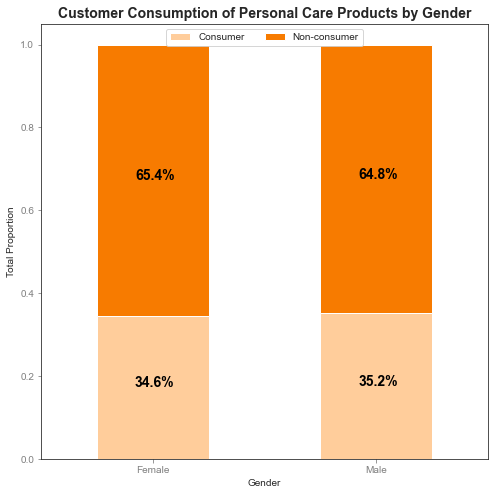

In [197]:
# Create a pie chart based on customer consume of personal care products by gender

personal_care_prods_consumers_gender_bar_stack = personal_care_consumers_gender.plot(kind = 'bar', stacked = True, color = ['#ffcd9b', '#f77b00'], figsize = (8, 8), rot = 0)

# Set descriptions

objects = ('Consumer', 'Non-consumer')
plt.legend(loc = 'upper center', ncol = 3, fontsize = 10, labels = objects)
plt.ylabel('Total Proportion')
plt.xlabel('Gender')
plt.tick_params(axis = 'x', colors = 'grey')
plt.tick_params(axis = 'y', colors = 'grey')
plt.title('Customer Consumption of Personal Care Products by Gender', fontsize = 14, fontweight = 'bold')

# Set proportions

for n, x in enumerate ([*personal_care_consumers_gender.index.values]):
    for (proportion, y_loc) in zip(personal_care_consumers_gender.loc[x],
                                   personal_care_consumers_gender.loc[x].cumsum()):
        plt.text(x = n - 0.08,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = "black",
                 fontsize = 14,
                 fontweight = "bold")
        
# Show chart

plt.show()

---

# 06 - Exporting Visualizations

In [198]:
# 1) Export the region distribution as a “.png” file

region_bar.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'region_barh_chart_distribution_4_10.png'))

In [199]:
# 2) Export the loyalty and region flags 100% stacked bar chart as a “.png” file

loyalty_region_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'loyalty_region_bar_stacked_4_10.png'))

In [200]:
# 3) Export the customer loyalty pie chart distribution as a “.png” file

cust_loyal_dist_pie.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'customer_loyalty_distribution_pie_4_10.png'))

In [201]:
# 4) Export the loyalty & spending flags 100% stacked bar chart as a “.png” file

loyalty_spending_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'loyalty_spending_bar_stacked_4_10.png'))

In [202]:
# 5) Export the loyalty & order frequency 100& stacked bar chart as a “.png” file

loyalty_ords_frequency_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'loyalty_orders_frequency_bar_stacked_4_10.png'))

In [203]:
# 6) Export the age group horizontal bar chart distribution as a “.png” file

age_group_dist_bar.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'age_group_barh_distribution_4_10.png'))

In [204]:
# 7) Export the income range horizontal bar chart distribution as a “.png” file

income_range_bar_dist.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'income_range_barh_distribution_4_10.png'))

In [205]:
# 8) Export the income range & age group 100% stacked bar chart distribution as a “.png” file

income_age_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'income_range_age_group_bar_stacked_4_10.png'))

In [206]:
# 9) Export the order frequency by income histogram as a “.png” file

ords_income_hist.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'frequency_orders_income_histogram_4_10.png'))

In [207]:
# 10) Export the department horizontal bar chart distribution as a “.png” file

department_bar_dist.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'department_orders_barh_distribution_4_10.png'))

In [208]:
# 11) Export the dependent status pie chart distribution as a “.png” file

depend_status_distr_pie.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'dependents_status_distribution_pie_4_10.png'))

In [209]:
# 12) Export the price range pie chart distribution as a “.png” file

price_range_distr_pie.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'price_range_distribution_pie_4_10.png'))

In [210]:
# 13) Export the marital status horizontal bar chart distribution as a “.png” file

marital_status_barh.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'marital_status_orders_barh_4_10.png'))

In [211]:
# 14) Export the marital status & age group bar chart distribution as a “.png” file

marital_status_age_bar.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'marital_status_age_group_bar_distribution_4_10.png'))

In [213]:
# 15) Export the pet product consumers pie chart distribution as a “.png” file

pet_status_pie.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'pet_status_pie_distribution_4_10.png'))

In [214]:
# 16) Export the pet product consumers & age group 100% stacked bar chart distribution as a “.png” file

pet_prods_consumers_age_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'pet_products_consumers_age_group_bar_stacked_4_10.png'))

In [215]:
# 17) Export the pet product consumers & gender 100% stacked bar chart distribution as a “.png” file

pet_prods_consumers_gender_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'pet_products_consumers_gender_bar_stacked_4_10.png'))

In [216]:
# 18) Export the alcohol consumers pie chart distribution as a “.png” file

alcohol_status_pie.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'alcohol_status_pie_distribution_4_10.png'))

In [217]:
# 19) Export the alcohol product consumers & age group 100% stacked bar chart distribution as a “.png” file

alcohol_prods_consumers_age_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'alcohol_products_consumers_age_group_bar_stacked_4_10.png'))

In [218]:
# 20) Export the alcohol product consumers & gender stacked bar chart distribution as a “.png” file

alcohol_prods_consumers_gender_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'alcohol_products_consumers_gender_bar_stacked_4_10.png'))

In [219]:
# 21) Export the baby product consumers pie chart distribution as a “.png” file

baby_status_pie.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'baby_status_pie_distribution_4_10.png'))

In [220]:
# 22) Export the baby product consumers & age group 100% stacked bar chart distribution as a “.png” file

baby_prods_consumers_age_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'baby_products_consumers_age_group_bar_stacked_4_10.png'))

In [221]:
# 23) Export the baby product consumers & gender 100% stacked bar chart distribution as a “.png” file

baby_prods_consumers_gender_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'baby_products_consumers_gender_bar_stacked_4_10.png'))

In [222]:
# 24) Export the personal care product consumers pie chart distribution as a “.png” file

personal_care_status_pie.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'personal_care_status_pie_distribution_4_10.png'))

In [223]:
# 25) Export the personal care product consumers & age group 100% stacked bar chart distribution as a “.png” file

personal_care_prods_consumers_age_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'personal_care_products_consumers_age_group_bar_stacked_4_10.png'))

In [224]:
# 26) Export the personal care product consumers & gender 100% stacked bar chart distribution as a “.png” file

personal_care_prods_consumers_gender_bar_stack.figure.savefig(os.path.join(path, '04 - Analysis','Visualizations', 'personal_care_products_consumers_gender_bar_stacked_4_10.png'))

---

# 07 - Exporting Data

In [198]:
# Export final dataframe as .pkl

df_merged.to_pickle(os.path.join(path, '02 - Data', 'Prepared Data', 'final_dataframe_4_10_delivered.pkl'))